<a href="https://colab.research.google.com/github/Sarmin-smrity/-introdatascience/blob/main/SA_with_TextBlob_Vaccination_Sentiments_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Exploration

In [3]:
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings
warnings.filterwarnings("ignore")
print("Library Setup Complete.")

Library Setup Complete.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/project twit/vaccination_tweets.csv")

In [4]:
import pandas  as pd
df = pd.read_csv("/content/drive/MyDrive/P2/vaccination_tweets.csv")


In [5]:
# getting 
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971510000,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250000,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140110000,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918830000,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604960000,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [6]:
# getting info of raw data
df.shape

(228207, 16)

In [7]:
## checking null value on raw data

df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [8]:
## Filling up null value to perform transofrmation

df['user_location'] = df['user_location'].fillna('Unknown')
df.isnull().sum()

id                      0
user_name               2
user_location           0
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [9]:
## performing transofrmation of data
import numpy as np

conditions = [
    (df['user_location'].str.contains('india', case=False)),
    (df['user_location'].str.contains('pakistan', case=False)),
    (df['user_location'].str.contains('bangladesh', case=False)),
    (df['user_location'].str.contains('nepal', case=False)),
    (df['user_location'].str.contains('bhutan', case=False)),
    (df['user_location'].str.contains('sri lanka', case=False)),
]


values = ['India', 'Pakistan', 'Bangladesh', 'Nepal', 'Bhutan', 'Sri Lanka']

df['user_country'] = np.select(conditions,values)

In [10]:
## overview country group data
df.groupby(['user_country']).count()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
user_country,,,,,,,,,,,,,,,,
0,178212,178210,178212,162831,178212,178212,178212,178212,178212,178212,178212,147091,178094,178212,178212,178212
Bangladesh,617,617,617,595,617,617,617,617,617,617,617,528,617,617,617,617
Bhutan,11,11,11,10,11,11,11,11,11,11,11,10,11,11,11,11
India,45077,45077,45077,43749,45077,45077,45077,45077,45077,45077,45077,27420,45076,45077,45077,45077
Nepal,92,92,92,86,92,92,92,92,92,92,92,73,92,92,92,92
Pakistan,2085,2085,2085,1968,2085,2085,2085,2085,2085,2085,2085,1717,2085,2085,2085,2085
Sri Lanka,2113,2113,2113,1950,2113,2113,2113,2113,2113,2113,2113,1665,2113,2113,2113,2113


In [11]:
## droping non South Asian country

df_c = df.loc[df['user_country'] != '0'].reset_index(drop=True)

In [12]:
# print 5 first values of the dataset

df_c.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_country
0,1337815730486700000,WION,India,#WION: World Is One | Welcome to India’s first...,3/21/2016 3:44,292510,91,7531,True,12/12/2020 17:45,The agency also released new information for h...,NaN,TweetDeck,0,18,False,India
1,1337773751841140000,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,3/16/2014 3:52,64185,1183,1794,True,12/12/2020 14:58,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False,India
2,1338631874814610000,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,12/30/2013 8:51,855,3046,8236,False,12/14/2020 23:48,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False,India
3,1338574693087930000,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,6/11/2012 13:50,3372,1713,119631,False,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,India
4,1338551175587780000,India Blooms,India,A news and reference portal on India and a 24X...,10/10/2009 11:19,16816,2448,20,False,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False,India


In [13]:
#checking data shape
df_c.shape

(49995, 17)

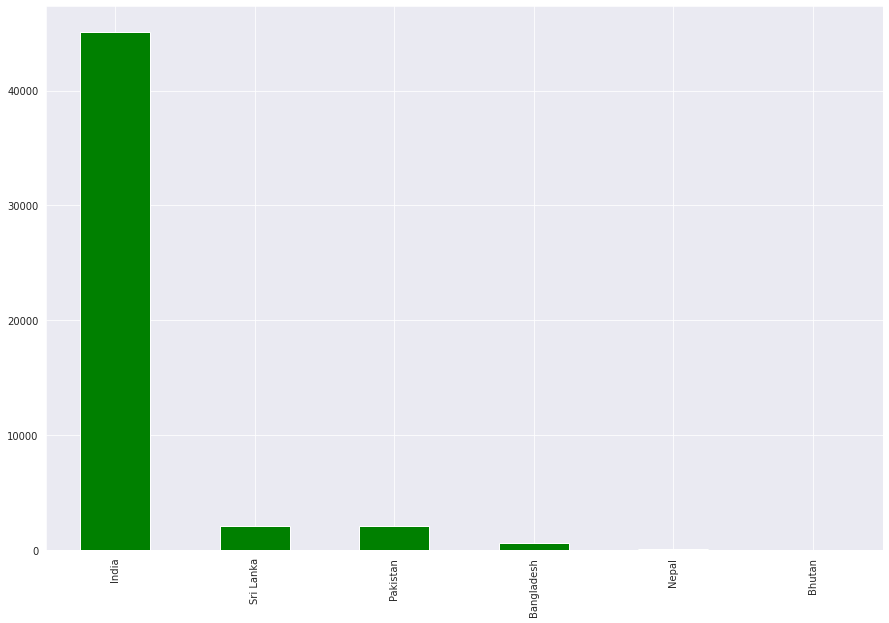

In [14]:
## country wise tweet count

plt.figure(figsize=(15,10))
location_serie = df_c['user_country']
location_serie = location_serie.value_counts(dropna=True).nlargest(20)
location_serie.plot(kind ='bar', color='green')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

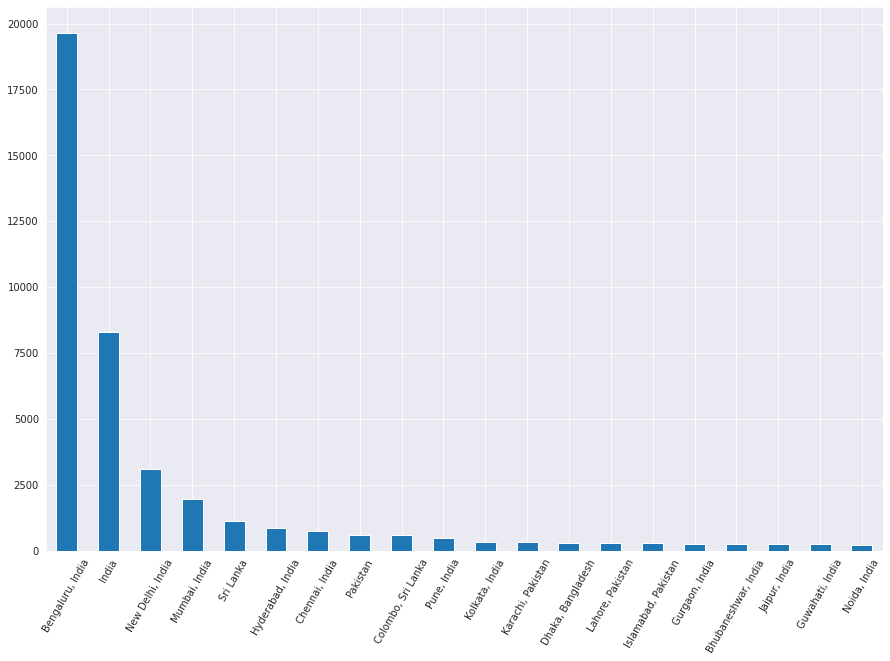

In [15]:
## Visulizing Tweet Count vs Location  
plt.figure(figsize=(15,10))
df_c['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [16]:
df_c.shape

(49995, 17)

In [17]:
#deleting repeated tweets
data = df_c.drop_duplicates(subset='text')

In [18]:
data.shape

(49925, 17)

In [19]:
#number of unique dates since we began scraping data
len(data['date'].unique())

32254

In [20]:
#we have almost a year of data concerning vaccine tweets
#then, we sort data by date
data.sort_values(by=['date'], ascending=True)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_country
139,1344954186098630000,Truescoopnews,"Jalandhar, India","#TrueScoopNews covers #LatestNews, #breakingNe...",2/26/2019 11:58,133,328,1119,False,1/1/2021 10:30,Both these vaccines were recently given nod fo...,NaN,Twitter Web App,0,0,False,India
138,1344990838347050000,Tapas Panda,"Bengaluru, India",https://t.co/V9xYYY02FH,6/4/2015 8:23,23,65,90,False,1/1/2021 12:56,How safe it is to trust on effectivity of made...,NaN,Twitter Web App,0,0,False,India
137,1345029236956930000,Tapas Panda,"Bengaluru, India",https://t.co/V9xYYY02FH,6/4/2015 8:23,23,65,90,False,1/1/2021 15:28,@ndtv I shall better wait for #PfizerBioNTech ...,"['PfizerBioNTech', 'Moderna']",Twitter Web App,0,1,False,India
136,1345056137041720000,Shafi Beldar,"Bengaluru, India",ooops. And I speak again. And Again!,5/16/2019 17:32,56,362,2869,False,1/1/2021 17:15,Let me also remind you that these were the cou...,NaN,Twitter for iPhone,0,0,False,India
154,1344834463360970000,LatestLY,"Mumbai, India","https://t.co/U4rHOvEUQR focuses on the What, W...",2/7/2017 5:41,67274,344,125,True,1/1/2021 2:34,#WHO Clears Pfizer-BioNTech Coronavirus Vaccin...,"['WHO', 'PfizerBioNTech', 'PfizerVaccine', 'Co...",Twitter Web App,0,1,False,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36707,1435890790484500000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:00,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India
36705,1435898379377110000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False,India
36323,1435898291242240000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #RURAL #Bengaluru #CovidVaccine Availabi...,"['RURAL', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India
36706,1435898335362090000,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,6/21/2021 8:44,23,0,0,False,9/9/2021 9:30,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False,India


In [21]:
#then we delete all unnecessary columns before starting the cleaning process
#data.drop(data.columns.difference(['id', 'user_location', 'user_country', 'date','text']), axis=1, inplace=True)
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,user_country
0,1337815730486700000,WION,India,#WION: World Is One | Welcome to India’s first...,3/21/2016 3:44,292510,91,7531,True,12/12/2020 17:45,The agency also released new information for h...,NaN,TweetDeck,0,18,False,India
1,1337773751841140000,BOOM Live,"Mumbai, India",IFCN certified fact-driven journalism. India's...,3/16/2014 3:52,64185,1183,1794,True,12/12/2020 14:58,The US Food and Drug Administration (FDA) has ...,NaN,Twitter Web App,1,5,False,India
2,1338631874814610000,Dr. Taha Khan,India | USA,MD/MPH • PGY1 Peds/Child Neurology @theBCRP (@...,12/30/2013 8:51,855,3046,8236,False,12/14/2020 23:48,I’ve never been so excited to get a vaccine 💉💉...,"['CovidVaccine', 'PfizerBioNTech', 'VaccinesSa...",Twitter for iPhone,1,10,False,India
3,1338574693087930000,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #I...,6/11/2012 13:50,3372,1713,119631,False,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists...,"['UgurSahin', 'ozlemtureci', 'Muslim', 'Pfizer...",Twitter for Android,0,0,False,India
4,1338551175587780000,India Blooms,India,A news and reference portal on India and a 24X...,10/10/2009 11:19,16816,2448,20,False,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfiz...,['Ontario'],Twitter Web App,0,0,False,India


# South Asian Country Data

In [22]:
import re
import string
import nltk
import matplotlib.pyplot as plt
plt.rc('figure',figsize=(17,13))
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
from plotly.subplots import make_subplots
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import datetime
import warnings
warnings.filterwarnings("ignore")
print("Library Setup Complete.")

Library Setup Complete.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
path='/content/drive/MyDrive/P2/clean_data_si_twt.csv'
df_c = pd.read_csv(path)

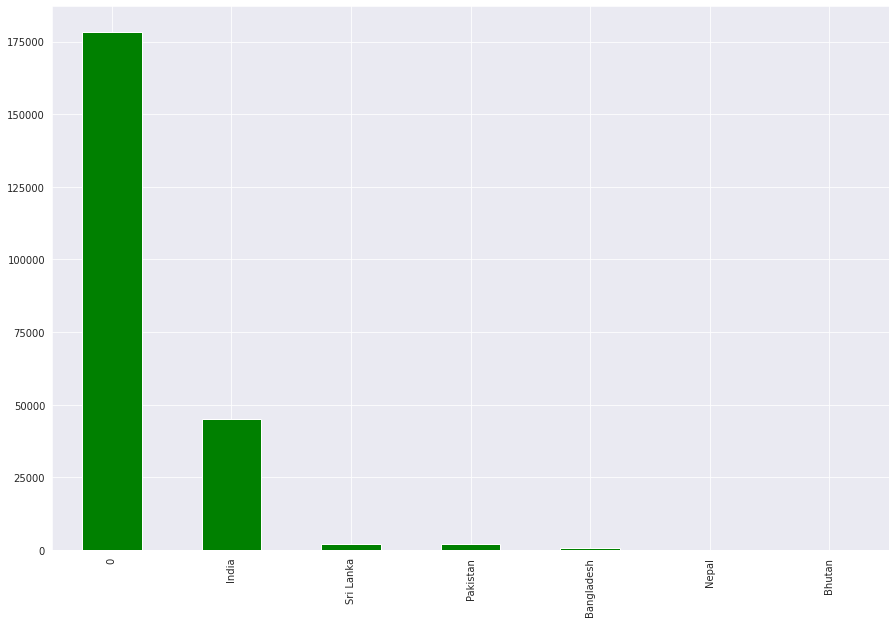

In [25]:
## country wise tweet count

plt.figure(figsize=(15,10))
location_serie = df_c['user_country']
location_serie = location_serie.value_counts(dropna=True).nlargest(20)
location_serie.plot(kind ='bar', color='green')
plt.show()

# TextBlob

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
tweets_data = data.copy() 


In [28]:
data = tweets_data

In [29]:
tweets_data.shape

(49925, 17)

In [30]:
data.shape

(49925, 17)

In [31]:
tweets_data = tweets_data.drop(['user_name', 'user_location', 
                                'user_description', 'user_created', 
                                'user_followers', 'user_friends', 
                                'user_favourites', 'user_verified', 
                                'source', 'retweets', 'favorites', 'is_retweet'], axis=1)

tweets_data['date'] = pd.to_datetime(tweets_data['date']).dt.date
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49925 entries, 0 to 49994
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            49925 non-null  int64 
 1   date          49925 non-null  object
 2   text          49925 non-null  object
 3   hashtags      31343 non-null  object
 4   user_country  49925 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [32]:
# fill null with 'Notags'
tweets_data['hashtags'] = tweets_data['hashtags'].fillna('Notags')
# cleaning and adaptive for analysis
tweets_data['hashtags'] = [re.sub("[(\[\')|(\]\')|\s]", '', tags) for tags in tweets_data['hashtags']]
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49925 entries, 0 to 49994
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            49925 non-null  int64 
 1   date          49925 non-null  object
 2   text          49925 non-null  object
 3   hashtags      49925 non-null  object
 4   user_country  49925 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [33]:
# prepare stopwords
stopwords = set(stopwords.words('english'))

In [34]:


# this 'deEmojify': via https://www.kaggle.com/sharibkhan/my-first-semantic-analysis-problem-in-nlp
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

def nlp(text):
    corpus = []
    text = deEmojify(text)
    text = re.sub('http\S+', '', text) # remove url
    text = re.sub('#\w+', '', text) # remove hashtags
    text = re.sub('@[^\s]+', '', text) # remove @twitter_id
    text = text.split()
    corpus = [txt for txt in text if not txt in stopwords]
    return ' '.join(corpus)

tweets_data['text_nlp'] = tweets_data['text'].apply(lambda x: nlp(x))
tweets_data['text_nlp'].head()

0    The agency also released new information healt...
1    The US Food Drug Administration (FDA) granted ...
2                        Ive never excited get vaccine
3                 Scientists Husband-Wife saving world
4    Toronto receive Ontario's 1st doses Pfizer COV...
Name: text_nlp, dtype: object

In [35]:
tweets_data

,id,date,text,hashtags,user_country,text_nlp
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,The agency also released new information healt...
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,The US Food Drug Administration (FDA) granted ...
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,Ive never excited get vaccine
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,Scientists Husband-Wife saving world
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,Toronto receive Ontario's 1st doses Pfizer COV...
...,...,...,...,...,...,...
49990,1460178320209820000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVAXIN",India,18-44 Availability 15/11 03:00PM FREE Slots - ...
49991,1460170772299660000,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,45+ Availability 15/11 02:30PM FREE Slots 0 PA...
49992,1460163268262050000,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"BBMP,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots - ...
49993,1460163224221850000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots 0 ...


In [36]:
# if you want to study more, below link is so useful for me
# https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

sample = tweets_data['text_nlp'][22]
print(sample)

testimonial = TextBlob(sample)
pola = testimonial.sentiment.polarity
subj = testimonial.sentiment.subjectivity
print('pola', pola, 'subj', subj)

: The Federal Aviation Administration (FAA) said Saturday approved use
pola 0.0 subj 0.0


In [37]:
sample = 'Thank you, but I finally use other items another gave me'
print(sample)

testimonial = TextBlob(sample)
pola = testimonial.sentiment.polarity
subj = testimonial.sentiment.subjectivity
print('pola', pola, 'subj', subj)

Thank you, but I finally use other items another gave me
pola -0.0625 subj 0.6875


Actually, polarity > 0 (or < 0) means pos or neg senti but I doubt 'is it really positive??'

Let's imagine when you tweet 'Thank you, but I finally use other items another gave me'

Of couse, it depends on your feeling but I think this is not 'negative'. This seems to be Neutral??

So, I set the threshold in my_function. Please change the threshold however you like when you have some opinion!

In [38]:
def polarity(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity
    return polarity


def subjectivity(text):
    testimonial = TextBlob(text)
    subjectivity = testimonial.subjectivity
    return subjectivity


def senti(text, polarity_threshold=0.2):
    testimonial = TextBlob(text)
    senti = testimonial.sentiment.polarity
    
    if senti >= polarity_threshold:
        return 'Positive'
    elif np.abs(senti) < polarity_threshold:
        return 'Neutral'
    else:
        return 'Negative'
    

tweets_data['polarity'] = tweets_data['text_nlp'].apply(lambda x: polarity(x))
tweets_data['subjectivity'] = tweets_data['text_nlp'].apply(lambda x: subjectivity(x))
tweets_data['sentiment'] = tweets_data['text_nlp'].apply(lambda x: senti(x))
tweets_data.head()

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,The agency also released new information healt...,0.136364,0.454545,Neutral
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,The US Food Drug Administration (FDA) granted ...,0.000000,0.000000,Neutral
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,Ive never excited get vaccine,-0.187500,0.750000,Neutral
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,Scientists Husband-Wife saving world,0.000000,0.000000,Neutral
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,Toronto receive Ontario's 1st doses Pfizer COV...,0.000000,0.000000,Neutral


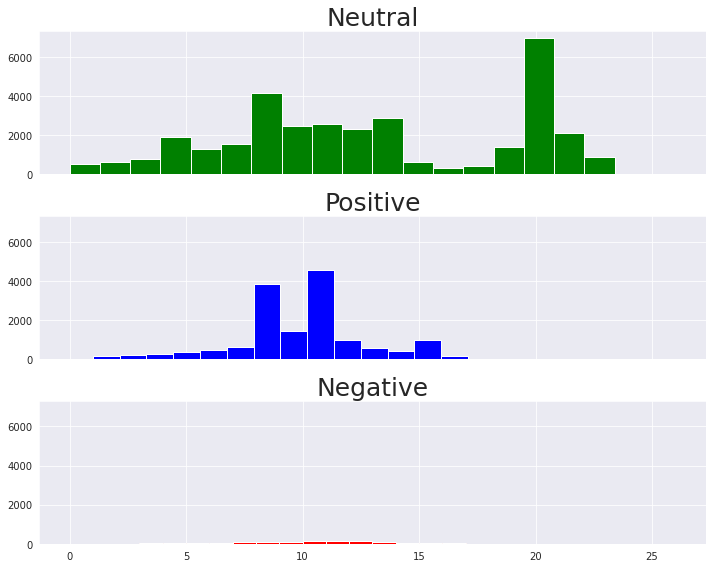

In [39]:
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharey=True, sharex=True)

sentiments = tweets_data['sentiment'].unique()
colors = ['green', 'blue', 'red']
plt.suptitle('', fontsize=30)
for i, senti in enumerate(sentiments):
    senti_df = tweets_data.query('sentiment==@senti')
  
    words_len = senti_df['text_nlp'].str.split().map(lambda x: len(x))
    ax[i].set_title(senti, fontsize=25)
    ax[i].hist(words_len, color=colors[i], bins=20)
    
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Overall Distribution of sentiments')

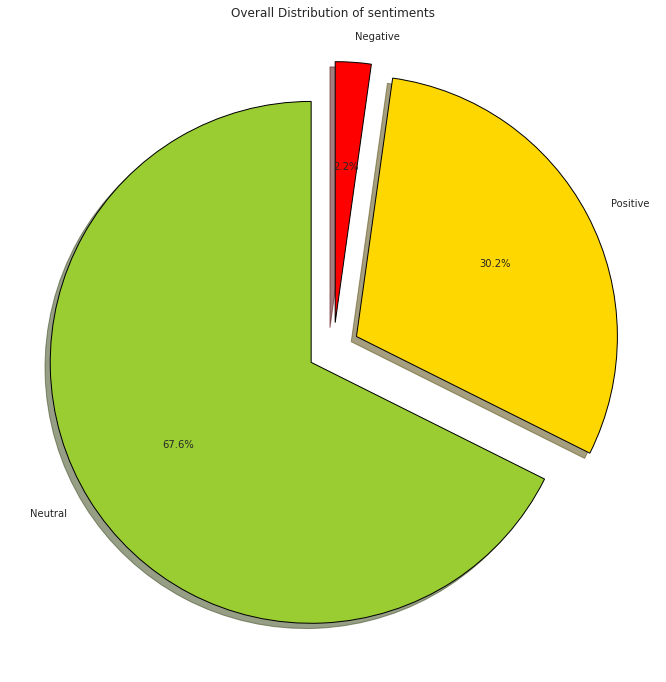

In [48]:
fig = plt.figure(figsize=(12,12))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':1, 'edgecolor':"black"}
tags = tweets_data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Overall Distribution of sentiments')

**Unigram**

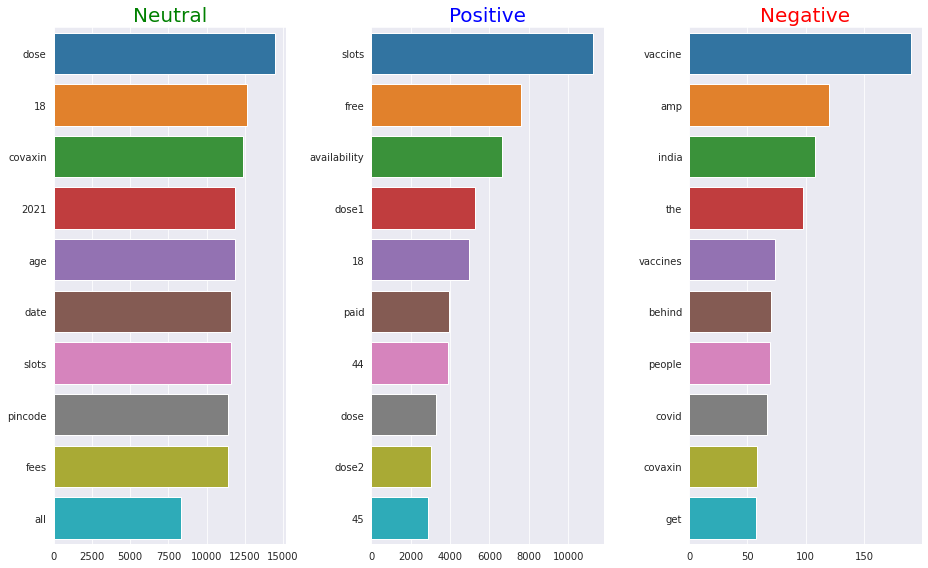

In [49]:

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

fig, ax = plt.subplots(1, 3, figsize=(13,8))
sentiments = tweets_data['sentiment'].unique()
colors = ['green', 'blue', 'red']
for i, senti in enumerate(sentiments):
    senti_df = senti_df = tweets_data.query('sentiment==@senti')['text_nlp']
    most_common_bi = get_top_text_ngrams(senti_df,10,1)
    most_common_bi = dict(most_common_bi)
    sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax=ax[i])
    ax[i].set_title(senti, fontsize=20, color=colors[i])

#plt.suptitle('Unigram ',y=0.95, x=0.2, fontsize=10)
plt.tight_layout()
plt.show()

**Bigram**

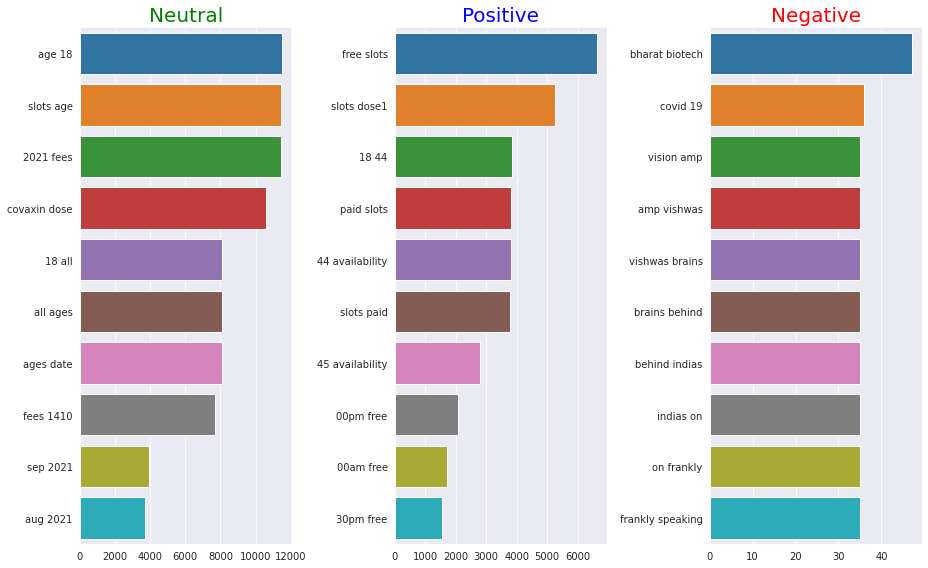

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(13,8))
sentiments = tweets_data['sentiment'].unique()
colors = ['green', 'blue', 'red']
for i, senti in enumerate(sentiments):
    senti_df = senti_df = tweets_data.query('sentiment==@senti')['text_nlp']
    most_common_bi = get_top_text_ngrams(senti_df, 10, 2)
    most_common_bi = dict(most_common_bi)
    sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax=ax[i])
    ax[i].set_title(senti, fontsize=20, color=colors[i])

#plt.suptitle('Bigram of each sentiment', fontsize=25)
plt.tight_layout()
plt.show()

**Trigram**

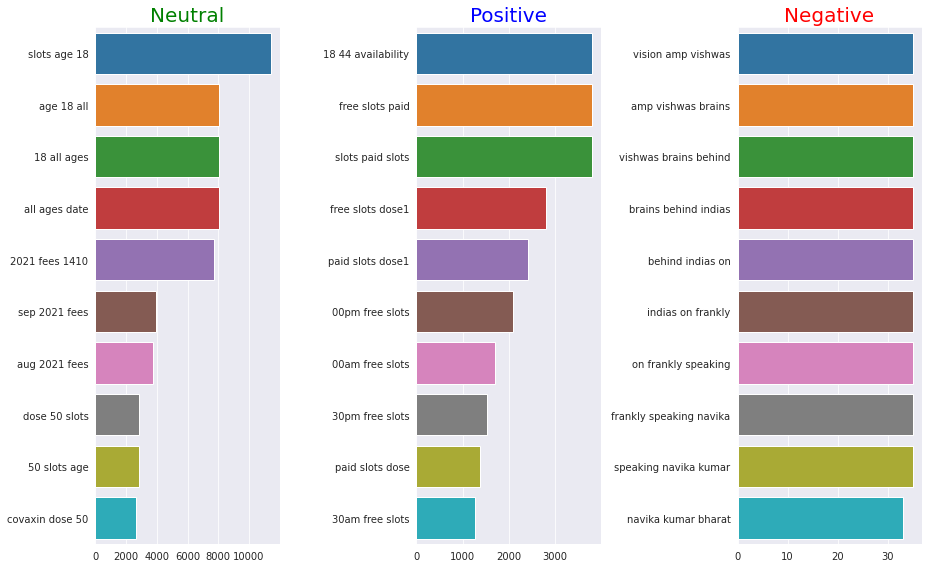

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(13,8))
sentiments = tweets_data['sentiment'].unique()
colors = ['green', 'blue', 'red']
for i, senti in enumerate(sentiments):
    senti_df = senti_df = tweets_data.query('sentiment==@senti')['text_nlp']
    most_common_bi = get_top_text_ngrams(senti_df, 10, 3)
    most_common_bi = dict(most_common_bi)
    sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()), ax=ax[i])
    ax[i].set_title(senti, fontsize=20, color=colors[i])

#plt.suptitle('Trigram of each sentiment', fontsize=25)
plt.tight_layout()
plt.show()

In [52]:
tweets_data

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,The agency also released new information healt...,0.136364,0.454545,Neutral
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,The US Food Drug Administration (FDA) granted ...,0.000000,0.000000,Neutral
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,Ive never excited get vaccine,-0.187500,0.750000,Neutral
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,Scientists Husband-Wife saving world,0.000000,0.000000,Neutral
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,Toronto receive Ontario's 1st doses Pfizer COV...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
49990,1460178320209820000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVAXIN",India,18-44 Availability 15/11 03:00PM FREE Slots - ...,0.400000,0.800000,Positive
49991,1460170772299660000,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,45+ Availability 15/11 02:30PM FREE Slots 0 PA...,0.400000,0.800000,Positive
49992,1460163268262050000,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"BBMP,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots - ...,0.400000,0.800000,Positive
49993,1460163224221850000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots 0 ...,0.400000,0.800000,Positive


# Aspect Based Sentiment Analysis with Spacy

In [53]:
 dataset = tweets_data.copy()

In [54]:
dataset

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,The agency also released new information healt...,0.136364,0.454545,Neutral
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,The US Food Drug Administration (FDA) granted ...,0.000000,0.000000,Neutral
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,Ive never excited get vaccine,-0.187500,0.750000,Neutral
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,Scientists Husband-Wife saving world,0.000000,0.000000,Neutral
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,Toronto receive Ontario's 1st doses Pfizer COV...,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...
49990,1460178320209820000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVAXIN",India,18-44 Availability 15/11 03:00PM FREE Slots - ...,0.400000,0.800000,Positive
49991,1460170772299660000,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,45+ Availability 15/11 02:30PM FREE Slots 0 PA...,0.400000,0.800000,Positive
49992,1460163268262050000,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"BBMP,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots - ...,0.400000,0.800000,Positive
49993,1460163224221850000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 Availability 15/11 02:00PM FREE Slots 0 ...,0.400000,0.800000,Positive


**Get the Aspect Terms**

In [55]:
import spacy
nlp = spacy.load('en_core_web_sm')

dataset.text_nlp = dataset.text_nlp.str.lower()

aspect_terms = []
for text_nlp in nlp.pipe(dataset.text_nlp):
    chunks = [(chunk.root.text) for chunk in text_nlp.noun_chunks if chunk.root.pos_ == 'NOUN']
    aspect_terms.append(' '.join(chunks))
dataset['aspect_terms'] = aspect_terms
dataset.head(10)

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment,aspect_terms
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,the agency also released new information healt...,0.136364,0.454545,Neutral,agency patients millions
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,the us food drug administration (fda) granted ...,0.000000,0.000000,Neutral,administration mrna
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,ive never excited get vaccine,-0.187500,0.750000,Neutral,vaccine
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,scientists husband-wife saving world,0.000000,0.000000,Neutral,wife world
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,toronto receive ontario's 1st doses pfizer cov...,0.000000,0.000000,Neutral,vaccine
5,1338469899518130000,2020-12-14,"#Singapore Approves Pfizer #COVID19 Vaccine, F...","Singapore,COVID19,December",India,"approves pfizer vaccine, first shipment expect...",0.075000,0.366667,Neutral,vaccine shipment end
6,1338466008466500000,2020-12-14,More approvals to #PfizerBioNTech vaccine: #Si...,"PfizerBioNTech,Singapore,CovidVaccine",India,"more approvals vaccine: approves , expects fir...",0.375000,0.416667,Positive,vaccine decemb
7,1338452833025150000,2020-12-14,#Singapore became on Monday the first Asian co...,"Singapore,PfizerBioNTech,CoronavirusVaccine",Bangladesh,became monday first asian country approve 's s...,0.125000,0.166667,Neutral,country
8,1338377471360560000,2020-12-14,#Pfizervaccine is unlikely to be available in ...,"Pfizervaccine,PfizerBioNTech",India,unlikely available india mass distribution. re...,-0.050000,0.450000,Neutral,distribution
9,1338310322206110000,2020-12-14,Pfizer-BioNTech COVID-19 Vaccine: Donald Trump...,Notags,India,pfizer-biontech covid-19 vaccine: donald trump...,0.245455,0.418182,Positive,vaccine officials access


In [56]:
#then we delete all unnecessary columns before starting the cleaning process
#dataset.drop(dataset.columns.difference(['id', 'user_country', 'date','hashtags']), axis=1, inplace=True)
dataset.head()

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment,aspect_terms
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,the agency also released new information healt...,0.136364,0.454545,Neutral,agency patients millions
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,the us food drug administration (fda) granted ...,0.000000,0.000000,Neutral,administration mrna
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,ive never excited get vaccine,-0.187500,0.750000,Neutral,vaccine
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,scientists husband-wife saving world,0.000000,0.000000,Neutral,wife world
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,toronto receive ontario's 1st doses pfizer cov...,0.000000,0.000000,Neutral,vaccine


**Sentiment Terms**

In [57]:
sentiment_terms = []
for text_nlp in nlp.pipe(dataset['text_nlp']):
        if text_nlp.is_parsed:
            sentiment_terms.append(' '.join([token.lemma_ for token in text_nlp if (not token.is_stop and not token.is_punct and (token.pos_ == "ADJ" or token.pos_ == "VERB"))]))
        else:
            sentiment_terms.append('')  
dataset['sentiment_terms'] = sentiment_terms
dataset.head(10)

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment,aspect_terms,sentiment_terms
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,the agency also released new information healt...,0.136364,0.454545,Neutral,agency patients millions,release new ship
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,the us food drug administration (fda) granted ...,0.000000,0.000000,Neutral,administration mrna,grant
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,ive never excited get vaccine,-0.187500,0.750000,Neutral,vaccine,excite
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,scientists husband-wife saving world,0.000000,0.000000,Neutral,wife world,save
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,toronto receive ontario's 1st doses pfizer cov...,0.000000,0.000000,Neutral,vaccine,receive 1st
5,1338469899518130000,2020-12-14,"#Singapore Approves Pfizer #COVID19 Vaccine, F...","Singapore,COVID19,December",India,"approves pfizer vaccine, first shipment expect...",0.075000,0.366667,Neutral,vaccine shipment end,approve expect say
6,1338466008466500000,2020-12-14,More approvals to #PfizerBioNTech vaccine: #Si...,"PfizerBioNTech,Singapore,CovidVaccine",India,"more approvals vaccine: approves , expects fir...",0.375000,0.416667,Positive,vaccine decemb,expect
7,1338452833025150000,2020-12-14,#Singapore became on Monday the first Asian co...,"Singapore,PfizerBioNTech,CoronavirusVaccine",Bangladesh,became monday first asian country approve 's s...,0.125000,0.166667,Neutral,country,asian say
8,1338377471360560000,2020-12-14,#Pfizervaccine is unlikely to be available in ...,"Pfizervaccine,PfizerBioNTech",India,unlikely available india mass distribution. re...,-0.050000,0.450000,Neutral,distribution,available read find
9,1338310322206110000,2020-12-14,Pfizer-BioNTech COVID-19 Vaccine: Donald Trump...,Notags,India,pfizer-biontech covid-19 vaccine: donald trump...,0.245455,0.418182,Positive,vaccine officials access,offer early


In [58]:
# counting positive, neutral and negative tweets
sid = SIA()
sentiments_nltk = []

for tweet in tweets_data.text_nlp:
     sentiment_dict = sid.polarity_scores(tweet)
     sentiment_dict.pop('compound', None)
     sentiments_nltk.append(max(sentiment_dict , key=sentiment_dict.get))
    
tweets_data['sentiment_nltk'] = sentiments_nltk
tweets_data['sentiment_nltk'].value_counts()

neu    47368
pos     1912
neg      645
Name: sentiment_nltk, dtype: int64

In [ ]:
from google.colab import files

dataset.to_csv('dataset.csv')
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Another** spacy

In [ ]:
# We get started by importing spacy
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
for sentence in sentences:
  doc = nlp(sentence)
  for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
      token.pos_,[child for child in token.children])

In [ ]:
dataset

,id,date,text,hashtags,user_country,text_nlp,polarity,subjectivity,sentiment,sentiment_nltk,aspect_terms
0,1337815730486700000,2020-12-12,The agency also released new information for h...,Notags,India,the agency also released new information healt...,0.136364,0.454545,Neutral,neu,agency patients millions
1,1337773751841140000,2020-12-12,The US Food and Drug Administration (FDA) has ...,Notags,India,the us food drug administration (fda) granted ...,0.000000,0.000000,Neutral,neu,administration mrna
2,1338631874814610000,2020-12-14,I’ve never been so excited to get a vaccine 💉💉...,"CovidVaccine,PfizerBioNTech,VaccinesSaveLives,...",India,ive never excited get vaccine,-0.187500,0.750000,Neutral,neu,vaccine
3,1338574693087930000,2020-12-14,#UgurSahin #ozlemtureci the #Muslim Scientists...,"UgurSahin,ozlemtureci,Muslim,PfizerBioNTech",India,scientists husband-wife saving world,0.000000,0.000000,Neutral,neu,wife world
4,1338551175587780000,2020-12-14,Toronto to receive Ontario's 1st doses of Pfiz...,Ontario,India,toronto receive ontario's 1st doses pfizer cov...,0.000000,0.000000,Neutral,neu,vaccine
...,...,...,...,...,...,...,...,...,...,...,...
49990,1460178320209820000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVAXIN",India,18-44 availability 15/11 03:00pm free slots - ...,0.400000,0.800000,Positive,neu,slots dose1:0
49991,1460170772299660000,2021-11-15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,45+ availability 15/11 02:30pm free slots 0 pa...,0.400000,0.800000,Positive,neu,slots slots
49992,1460163268262050000,2021-11-15,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"BBMP,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 availability 15/11 02:00pm free slots - ...,0.400000,0.800000,Positive,neu,slots
49993,1460163224221850000,2021-11-15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"URBAN,Bengaluru,CovidVaccine,COVISHIELD",India,18-44 availability 15/11 02:00pm free slots 0 ...,0.400000,0.800000,Positive,neu,slots slots


In [ ]:
for text_nlp in dataset:
  doc = nlp(text_nlp)
  for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
      token.pos_,[child for child in token.children])

i ROOT i NOUN NOUN [d]
d punct i NOUN PROPN []
date ROOT date NOUN NOUN []
text ROOT text NOUN NOUN []
hashtags ROOT hashtags NOUN NOUN []
user_country ROOT user_country NOUN NOUN []
text_nlp ROOT text_nlp PRON PRON []
polarity ROOT polarity NOUN NOUN []
subjectivity ROOT subjectivity NOUN NOUN []
sentiment ROOT sentiment NOUN NOUN []
sentiment_nltk ROOT sentiment_nltk NOUN NOUN []
aspect_terms ROOT aspect_terms NOUN NOUN []


In [ ]:
for text_nlp in dataset:
  doc = nlp(text_nlp)
  descriptive_term = ''
  for token in doc:
    if token.pos_ == 'ADJ':
      descriptive_term = token
  print(text_nlp)
  print(descriptive_term)

id

date

text

hashtags

user_country

text_nlp

polarity

subjectivity

sentiment

sentiment_nltk

aspect_terms



In [ ]:
for text_nlp in dataset:
  doc = nlp(text_nlp)
  descriptive_term = ''
  for token in doc:
    if token.pos_ == 'ADJ':
      prepend = ''
      for child in token.children:
        if child.pos_ != 'ADV':
          continue
        prepend += child.text + ' '
      descriptive_term = prepend + token.text
  print(text_nlp)
  print(descriptive_term)

id

date

text

hashtags

user_country

text_nlp

polarity

subjectivity

sentiment

sentiment_nltk

aspect_terms



In [ ]:
aspects = []
for text_nlp in dataset:
  doc = nlp(text_nlp)
  descriptive_term = ''
  target = ''
  for token in doc:
    if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
      target = token.text
    if token.pos_ == 'ADJ':
      prepend = ''
      for child in token.children:
        if child.pos_ != 'ADV':
          continue
        prepend += child.text + ' '
      descriptive_term = prepend + token.text
  aspects.append({'aspect': target,
    'description': descriptive_term})
print(aspects)

[{'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}, {'aspect': '', 'description': ''}]


# Moeling

**Spliting**

In [61]:
#initialising dataset on which trianing is based
X = tweets_data.text_nlp # get all the text in x variable
y = tweets_data.sentiment_nltk # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y

(49925,)
(49925,)


In [62]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20

In [63]:
#  import TF-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))
#transforming data to vector form to feed as input to the models
vect.fit(X_train) # fit or traing data tweets to vect
X_train_tm = vect.transform(X_train) # transform our training data tweets
X_test_tm = vect.transform(X_test)# transform our testing data tweets

In [65]:
# Oversample imbalanced dataset with SMOTE
from collections import Counter
counter = Counter(y_train)
print("Imbalanced data:",counter)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train_tm, y_train.ravel())
counter = Counter(y_train_res)
print("Balanced data:",counter)

Imbalanced data: Counter({'neu': 37882, 'pos': 1560, 'neg': 498})
Balanced data: Counter({'neu': 37882, 'pos': 37882, 'neg': 37882})


In [66]:
#Import modules to calculate accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [68]:
lr.fit(X_train_res, y_train_res)
pred_lr = lr.predict(X_test_tm)

In [69]:
accuracy = accuracy_score(y_test, pred_lr)
print("LR: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))

LR: Test Accuracy: 95.64%
              precision    recall  f1-score   support

         neg       0.42      0.65      0.51       147
         neu       0.99      0.97      0.98      9486
         pos       0.60      0.77      0.67       352

    accuracy                           0.96      9985
   macro avg       0.67      0.79      0.72      9985
weighted avg       0.96      0.96      0.96      9985

[[  95   51    1]
 [ 120 9185  181]
 [  13   69  270]]


In [73]:
from matplotlib import style
style.use('ggplot')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

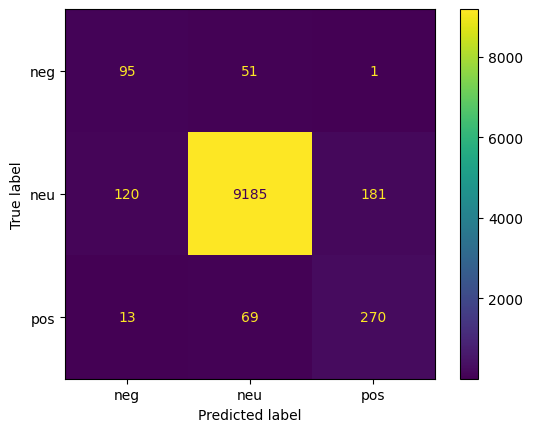

In [80]:
style.use('default')
cm = confusion_matrix(y_test, pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lr.classes_)
disp.plot()

**Random Forest**

In [81]:
#random forest
from sklearn.ensemble import RandomForestClassifier # import Random forest from sklearn
rf = RandomForestClassifier()

In [83]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [84]:
rf_pred = rf.predict(X_test_tm)

In [85]:
accuracy = accuracy_score(y_test, rf_pred)
print("RF: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

RF: Test Accuracy: 95.63%
              precision    recall  f1-score   support

         neg       0.44      0.56      0.49       147
         neu       0.98      0.98      0.98      9486
         pos       0.60      0.61      0.60       352

    accuracy                           0.96      9985
   macro avg       0.67      0.71      0.69      9985
weighted avg       0.96      0.96      0.96      9985

[[  82   62    3]
 [  94 9253  139]
 [   9  129  214]]


**Naive Bayes**



In [88]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10
nb.fit(X_train_res, y_train_res)# fit our both traing data tweets as well as its sentiments to the multinomial naive bayes mod
y_pred_nb = nb.predict(X_test_tm) # predict the sentiments of testing data tweets

In [89]:
accuracy = accuracy_score(y_test, y_pred_nb)
print("NB: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))

NB: Test Accuracy: 83.64%
              precision    recall  f1-score   support

         neg       0.44      0.67      0.53       147
         neu       0.99      0.84      0.91      9486
         pos       0.18      0.94      0.31       352

    accuracy                           0.84      9985
   macro avg       0.54      0.81      0.58      9985
weighted avg       0.96      0.84      0.88      9985

[[  98   26   23]
 [ 121 7923 1442]
 [   3   19  330]]


In [90]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_res, y = y_train_res, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean()

0.9064736442820104

**Linear SVM**

In [91]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [94]:
svm_clf.fit(X_train_tm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model
y_pred_svm = svm_clf.predict(X_test_tm)  # predict the sentiments of testing data tweets

accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_svm))
print(confusion_matrix(y_test,y_pred_svm))

SVM: Test Accuracy: 96.84%
              precision    recall  f1-score   support

         neg       0.86      0.12      0.21       147
         neu       0.97      1.00      0.98      9486
         pos       0.82      0.60      0.70       352

    accuracy                           0.97      9985
   macro avg       0.88      0.57      0.63      9985
weighted avg       0.97      0.97      0.96      9985

[[  18  128    1]
 [   2 9439   45]
 [   1  139  212]]


**10 fold cross validation**

In [95]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_tm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.9633199799699549

**XGBoost**

In [96]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, n_estimators=400, learning_rate=0.3, objective='binary:logistic')
xgb.fit(X_train_tm, y_train)


In [98]:
xgb_pred = xgb.predict(X_test_tm)

In [99]:
accuracy = accuracy_score(y_test, xgb_pred)
print("xgb: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

xgb: Test Accuracy: 94.62%
              precision    recall  f1-score   support

         neg       0.62      0.20      0.30       147
         neu       0.98      0.96      0.97      9486
         pos       0.45      0.78      0.57       352

    accuracy                           0.95      9985
   macro avg       0.68      0.65      0.61      9985
weighted avg       0.96      0.95      0.95      9985

[[  29  110    8]
 [  18 9145  323]
 [   0   78  274]]


**Decision Tree**


In [100]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_tm,y_train)
dt_pred = dt.predict(X_test_tm)

In [101]:
accuracy = accuracy_score(y_test, dt_pred)
print("DT: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,dt_pred))
print(confusion_matrix(y_test,dt_pred))

DT: Test Accuracy: 91.06%
              precision    recall  f1-score   support

         neg       0.32      0.67      0.43       147
         neu       0.99      0.92      0.95      9486
         pos       0.32      0.74      0.44       352

    accuracy                           0.91      9985
   macro avg       0.54      0.78      0.61      9985
weighted avg       0.95      0.91      0.93      9985

[[  99   39    9]
 [ 198 8732  556]
 [  13   78  261]]


**Catboost**

In [102]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.4 MB/s 


In [103]:
import catboost as ctb
model_CBC = ctb.CatBoostClassifier()

In [104]:
model_CBC.fit(X_train_tm, y_train)

Learning rate set to 0.095498
0:	learn: 0.9440145	total: 4.32s	remaining: 1h 11m 56s
1:	learn: 0.8271136	total: 6.93s	remaining: 57m 37s
2:	learn: 0.7345138	total: 9.61s	remaining: 53m 13s
3:	learn: 0.6598995	total: 12.2s	remaining: 50m 44s
4:	learn: 0.5985142	total: 14.8s	remaining: 49m 15s
5:	learn: 0.5472519	total: 17.5s	remaining: 48m 17s
6:	learn: 0.5026060	total: 20.1s	remaining: 47m 35s
7:	learn: 0.4657513	total: 22.8s	remaining: 47m 3s
8:	learn: 0.4329114	total: 25.4s	remaining: 46m 41s
9:	learn: 0.4047049	total: 28.1s	remaining: 46m 20s
10:	learn: 0.3801870	total: 30.7s	remaining: 46m 2s
11:	learn: 0.3574489	total: 33.4s	remaining: 45m 52s
12:	learn: 0.3391849	total: 37.5s	remaining: 47m 25s
13:	learn: 0.3224135	total: 40.5s	remaining: 47m 33s
14:	learn: 0.3075987	total: 43.2s	remaining: 47m 14s
15:	learn: 0.2947076	total: 45.9s	remaining: 47m 2s
16:	learn: 0.2822554	total: 48.5s	remaining: 46m 45s
17:	learn: 0.2718364	total: 51.2s	remaining: 46m 31s
18:	learn: 0.2618817	total

In [105]:
y_pred_cb = model_CBC.predict(X_test_tm)

In [107]:
accuracy = accuracy_score(y_test, y_pred_cb)
print("catBoost: Test Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test,y_pred_cb))
print(confusion_matrix(y_test,y_pred_cb))

catBoost: Test Accuracy: 94.65%
              precision    recall  f1-score   support

         neg       0.65      0.07      0.13       147
         neu       0.97      0.97      0.97      9486
         pos       0.46      0.68      0.55       352

    accuracy                           0.95      9985
   macro avg       0.69      0.57      0.55      9985
weighted avg       0.95      0.95      0.94      9985

[[  11  131    5]
 [   6 9201  279]
 [   0  113  239]]
